In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
import pandas as pd

df = pd.read_excel('/Users/andreasbrogaard/Documents/dsp_project/dsp_project/Data Collection/gpt_response_clean.xlsx')

#df_train = df[['Type', 'Ask.price', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Monthly_ownership_cost.1', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
#df = df[[ 'Ask.price', 'Type', 'Year_built', 'Energy_rating', 'Monthly_ownership_cost', 'Days_desc', 'Municipality', 'Rooms', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']]
df.head()




,0,Type,Ask.price,Year_built,Energy_rating,Monthly_ownership_cost,Time_for_sale,days_for_sale,Days_desc,Description,...,Balcony,Garden,Parking,Swimming pool,Fireplace,Garage,Basement,Elevator,Air_conditioning,Heating_type
0,Tingskovvej 70,Villa,2499000,1911.0,D,2466,60 dage,60,51-100,Hyggelig villa med fede udearealer\nI Tranbjer...,...,True,True,True,False,True,True,False,False,False,not_stated
1,"Sejrøgade 18, 4. TH",Ejerlejlighed,3495000,1930.0,D,3918,21 dage,21,21-50,Flot 3-værelses lejlighed i Ø-gadekvarteret\nB...,...,False,False,False,False,False,False,False,False,False,not_stated
2,Todderupparken 14,Villa,2748000,1970.0,D,2638,207 dage,207,100+,1-plans familievilla på lukket vej\nDen yderst...,...,False,True,True,False,False,False,False,False,False,not_stated
3,"Østergårdsvej 248, Astrup",Villa,3650000,1900.0,A2010,3204,0 dage,0,1-10,Spændende ved­li­ge­hol­del­ses­ven­lig villa\...,...,False,True,False,False,True,False,False,False,False,not_stated
4,"Grøfthøjparken 162, 3. th",Ejerlejlighed,1199000,1970.0,B,2050,0 dage,0,1-10,"Fin 2´er i ""højhuset"" - pæn og nydelig\nI højh...",...,False,False,False,False,False,False,False,False,False,not_stated


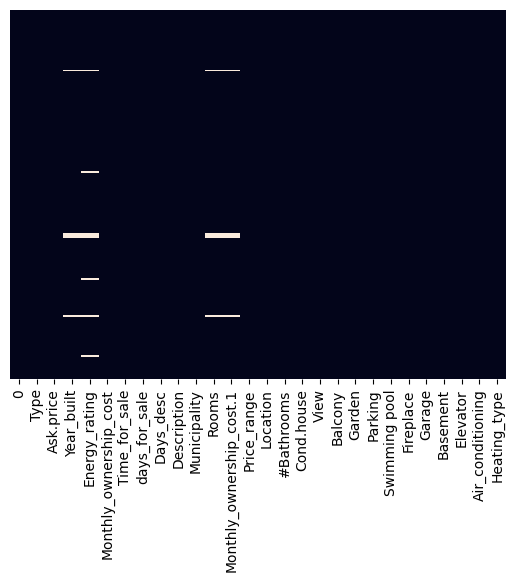

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the missing values
# 'cbar = False' removes the color bar
# 'yticklabels = False' removes the y-axis labels
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

# Show the plot
plt.show()

In [5]:
na_rows = df[df.isna().any(axis=1)]
na_indices = na_rows.index.tolist()
print("NA rows:")
print(na_rows)
print("NA row indices:")
print(na_indices)

df.dropna(inplace=True)


NA rows:
                       0         Type  Ask.price  Year_built Energy_rating  \
32        Skovbjergvej 7  Helårsgrund    2995000         NaN           NaN   
86      Under Rønnene 32   Fritidshus    3198000      1981.0           NaN   
119        Østerbyvej 1B  Helårsgrund    2295000         NaN           NaN   
120        Østerbyvej 1A  Helårsgrund    2295000         NaN           NaN   
121        Østerbyvej 1C  Helårsgrund    2295000         NaN           NaN   
143       Havlundsvej 34   Fritidshus    7998000      1986.0           NaN   
163  Onsholtgårdsvej 108  Helårsgrund    2498000         NaN           NaN   
184         Nobilisvej 9   Fritidshus    3198000      1964.0           NaN   

     Monthly_ownership_cost Time_for_sale  days_for_sale Days_desc  \
32                     1270       19 dage             19     11-20   
86                     2889       55 dage             55    51-100   
119                     448       85 dage             85    51-100   
120     

In [6]:
df.info()
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 0 to 196
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         189 non-null    object 
 1   Type                      189 non-null    object 
 2   Ask.price                 189 non-null    int64  
 3   Year_built                189 non-null    float64
 4   Energy_rating             189 non-null    object 
 5   Monthly_ownership_cost    189 non-null    int64  
 6   Time_for_sale             189 non-null    object 
 7   days_for_sale             189 non-null    int64  
 8   Days_desc                 189 non-null    object 
 9   Description               189 non-null    object 
 10  Municipality              189 non-null    object 
 11  Rooms                     189 non-null    float64
 12  Monthly_ownership_cost.1  189 non-null    float64
 13  Price_range               189 non-null    object 
 14  Location       

In [7]:
import numpy as np
import seaborn as sns
boolean_vars = ['Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

# Make sure 'df' is defined and accessible in the current cell

for var in boolean_vars:
    print(df[var].value_counts())
    print()





Balcony
False    137
True      52
Name: count, dtype: int64

Garden
True     121
False     68
Name: count, dtype: int64

Parking
True     128
False     61
Name: count, dtype: int64

Swimming pool
False    188
True       1
Name: count, dtype: int64

Fireplace
False    161
True      28
Name: count, dtype: int64

Garage
False    133
True      56
Name: count, dtype: int64

Basement
False    140
True      49
Name: count, dtype: int64

Elevator
False    184
True       5
Name: count, dtype: int64

Air_conditioning
False    189
Name: count, dtype: int64

Heating_type
not_stated                     156
Gulvvarme                       12
floor heating                    8
fjernvarme                       2
Radiators                        2
Var­me­gen­vin­dings­an­læg      2
zoneopdelt gulvvarme             1
solar                            1
Radiator                         1
Brændeovn                        1
luft til vand varmepumpe         1
gulvvarme                        1
Floor heating 

<H1> correcting the data types

In [8]:
df['Ask.price'] = pd.to_numeric(df['Ask.price'], errors='coerce')
df['Monthly_ownership_cost'] = pd.to_numeric(df['Monthly_ownership_cost'], errors='coerce')
#df['Time_for_sale'] = df['Time_for_sale'].str.replace(' dage', '').astype(int)
#df['days_for_sale'] = pd.to_numeric(df['days_for_sale'], errors='coerce')
df['Days_desc'] = df['Days_desc'].astype('category')
df['Municipality'] = df['Municipality'].astype('category')
df['Year_built'] = df['Year_built'].astype(int)
df['Rooms'] = df['Rooms'].astype(int)
df['Energy_rating'] = df['Energy_rating'].astype('category')
df['Location'] = df['Location'].astype('category')
df['#Bathrooms'] = df['#Bathrooms'].astype('category')
df['cond.house'] = df['Cond.house'].astype('category')
df['View'] = df['View'].astype('category')

#Rest of the columns are boolean, pandas have already converted them to boolean



In [9]:
import seaborn as sns
numerical_vars = ['Ask.price', 'Year_built', 'Monthly_ownership_cost', 'Rooms', '#Bathrooms']

# Make sure 'df' is defined and accessible in the current cell

numerical_stats = df[numerical_vars].describe()
print(numerical_stats)



categorical_vars = ['Type', 'Energy_rating', 'Municipality', 'Cond.house', 'View', 'Heating_type', 'Balcony', 'Garden']

# Calculate frequency counts for categorical variables
for var in categorical_vars:
    freq_counts = df[var].value_counts()
    print(f"Frequency counts for {var}:")
    print(freq_counts)
    print()

# Calculate mode for categorical variables
for var in categorical_vars:
    mode_val = df[var].mode().values[0]
    print(f"Mode for {var}: {mode_val}")
    print()



          Ask.price   Year_built  Monthly_ownership_cost       Rooms
count  1.890000e+02   189.000000              189.000000  189.000000
mean   3.781498e+06  1961.031746             3247.978836    2.968254
std    2.606676e+06    37.843730             1310.508396    1.036077
min    4.950000e+05  1850.000000             1398.000000    1.000000
25%    2.299000e+06  1937.000000             2410.000000    2.000000
50%    2.998000e+06  1968.000000             2938.000000    3.000000
75%    4.395000e+06  1986.000000             3748.000000    3.000000
max    1.850000e+07  2023.000000            10878.000000    6.000000
Frequency counts for Type:
Type
Villa            83
Ejerlejlighed    67
Rækkehus         32
Andelsbolig       5
Landejendom       2
Name: count, dtype: int64

Frequency counts for Energy_rating:
Energy_rating
C        73
D        57
B        20
A2015    13
A2010    12
E        11
G         2
F         1
Name: count, dtype: int64

Frequency counts for Municipality:
Municipality

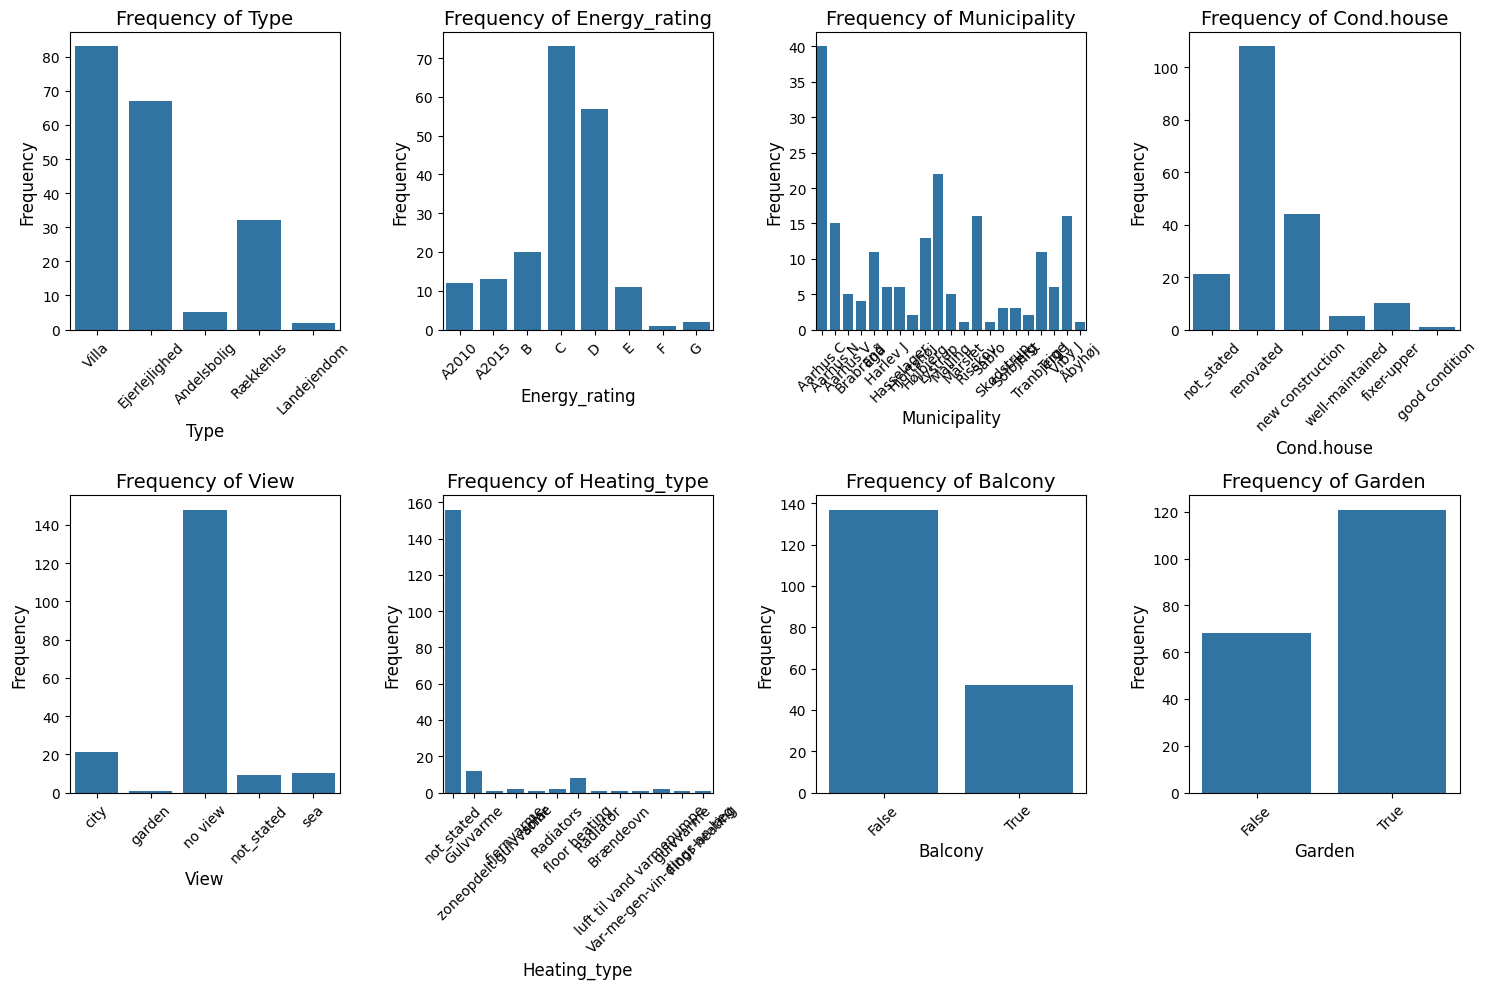

In [10]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
num_rows = 2
num_cols = 4

# Create a new figure and set the size
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# Iterate over the categorical variables and create bar plots
for i, var in enumerate(categorical_vars):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols
    
    # Create the bar plot in the current subplot
    sns.countplot(data=df, x=var, ax=axes[row, col])
    axes[row, col].set_xlabel(var, fontsize=12)  # Set font size
    axes[row, col].set_ylabel('Frequency', fontsize=12)  # Set font size
    axes[row, col].set_title(f'Frequency of {var}', fontsize=14)  # Set font size
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


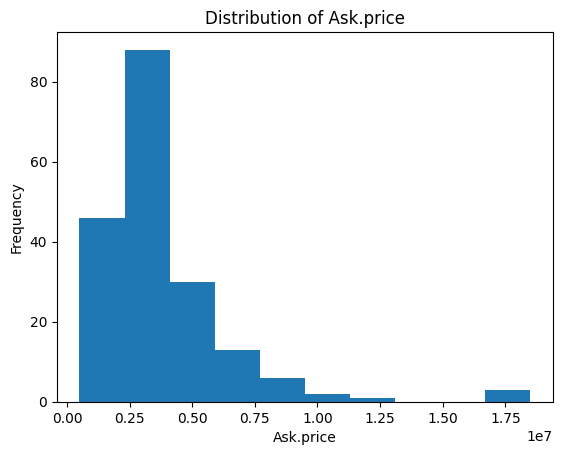

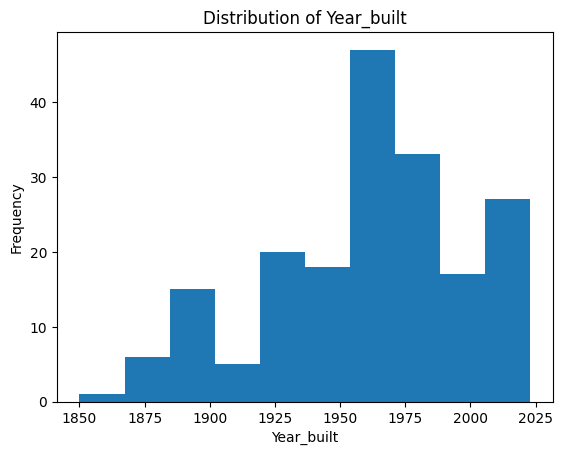

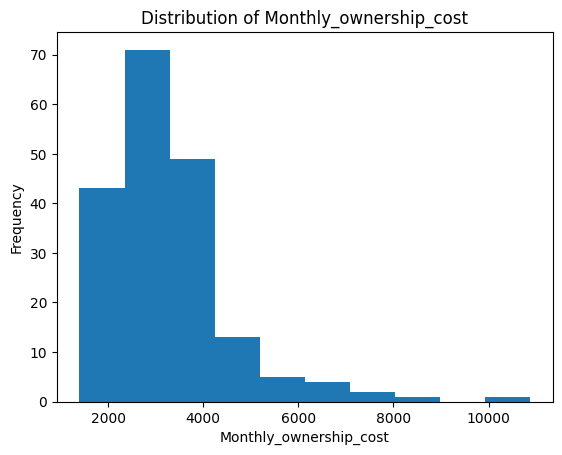

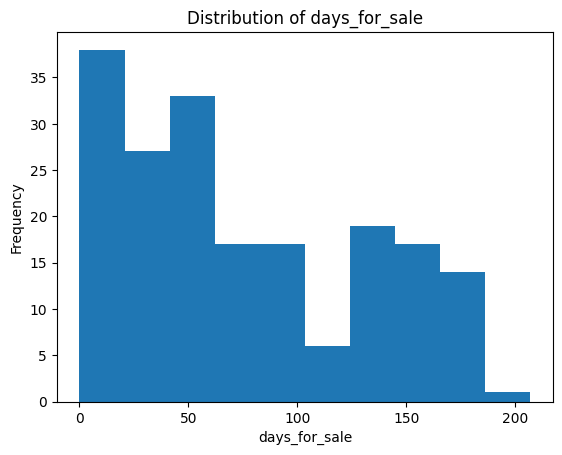

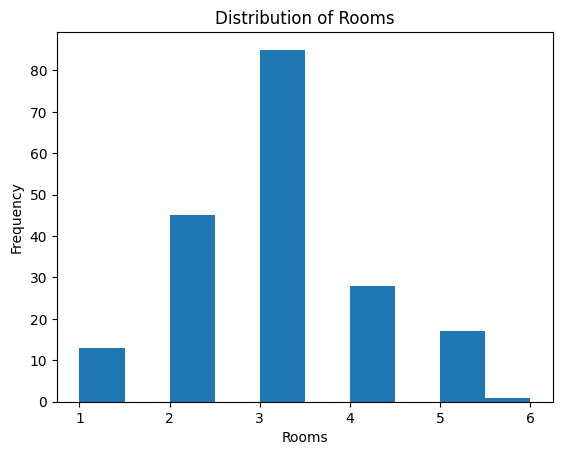

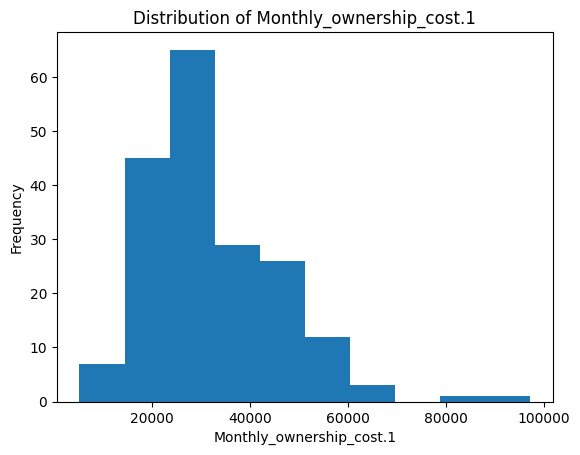

TypeError: no numeric data to plot

In [11]:
import matplotlib.pyplot as plt

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].plot(kind='hist', bins=10)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {column}')
        plt.show()


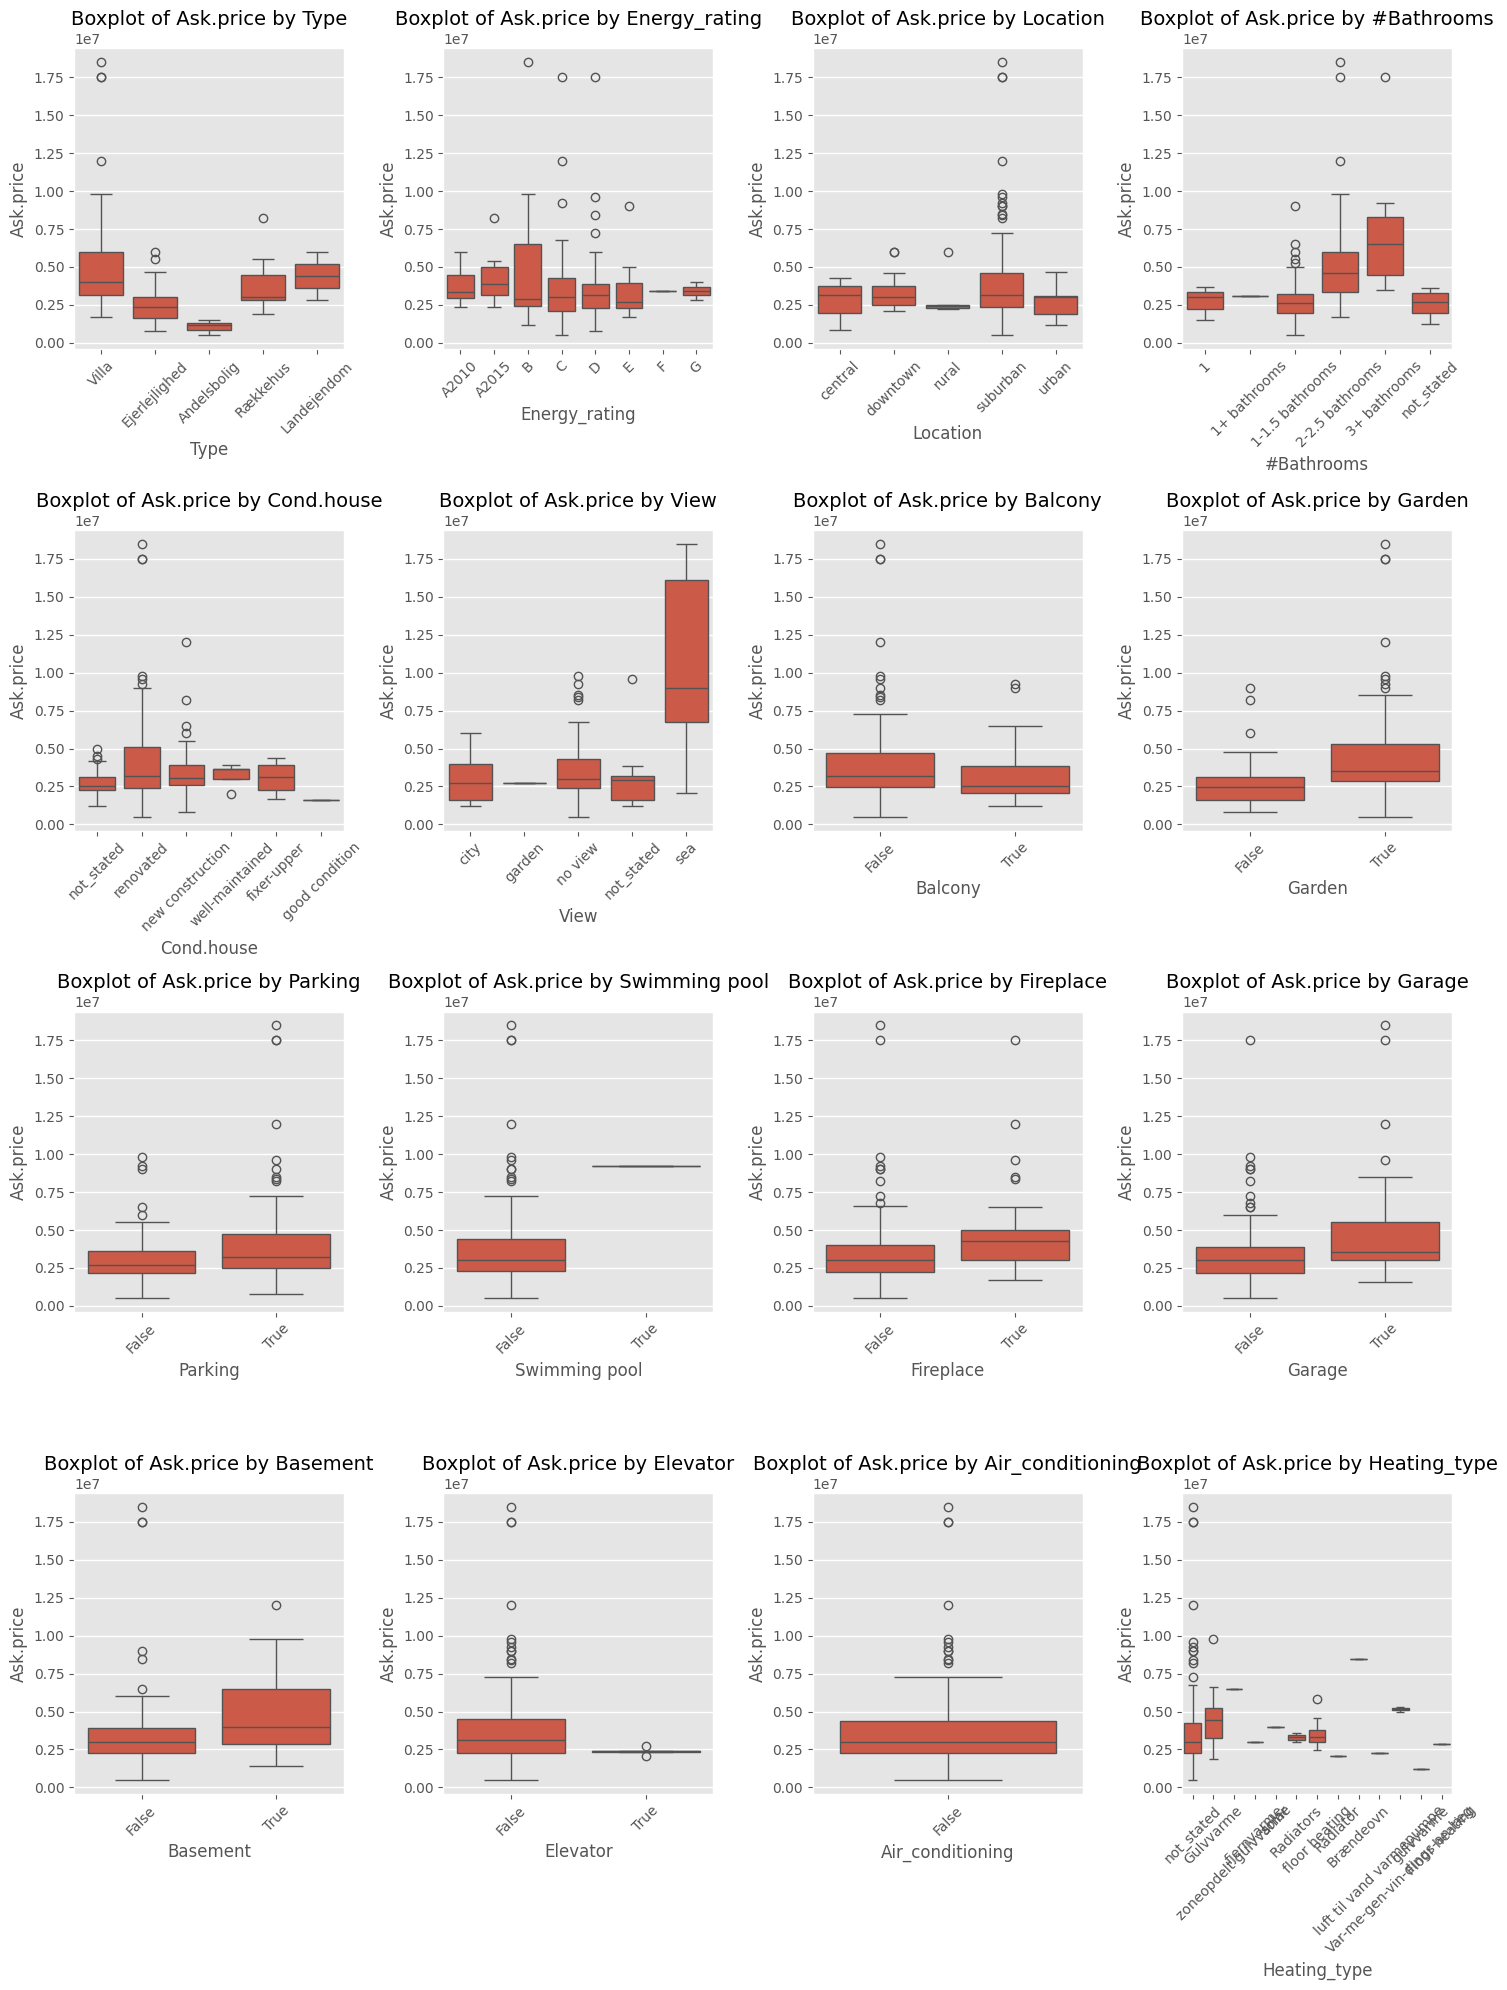

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Type', 'Energy_rating', 'Location', '#Bathrooms', 'Cond.house', 'View', 'Balcony', 'Garden', 'Parking', 'Swimming pool', 'Fireplace', 'Garage', 'Basement', 'Elevator', 'Air_conditioning', 'Heating_type']

num_rows = 4
num_cols = min(len(categorical_vars), 4)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))  # Increase the height of the figure

# Iterate over the categorical variables and create boxplots
for i, var in enumerate(categorical_vars):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols
    
    # Create the boxplot in the current subplot
    sns.boxplot(data=df, x=var, y='Ask.price', ax=axes[row, col])
    axes[row, col].set_xlabel(var, fontsize=12)  # Set font size
    axes[row, col].set_ylabel('Ask.price', fontsize=12)  # Set font size
    axes[row, col].set_title(f'Boxplot of Ask.price by {var}', fontsize=14)  # Set font size
    axes[row, col].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


                             Ask.price  Year_built  Monthly_ownership_cost  \
Ask.price                     1.000000   -0.010187                0.827577   
Year_built                   -0.010187    1.000000               -0.065973   
Monthly_ownership_cost        0.827577   -0.065973                1.000000   
Rooms                         0.477160   -0.043521                0.426903   
Monthly_ownership_cost.1      0.648259   -0.081705                0.516167   
...                                ...         ...                     ...   
cond.house_good condition    -0.061339    0.015397               -0.012052   
cond.house_new construction  -0.046740    0.308019               -0.089283   
cond.house_not_stated        -0.133627   -0.011449               -0.133853   
cond.house_renovated          0.173222   -0.193596                0.177772   
cond.house_well-maintained   -0.034525   -0.077880               -0.056777   

                                Rooms  Monthly_ownership_cost.1

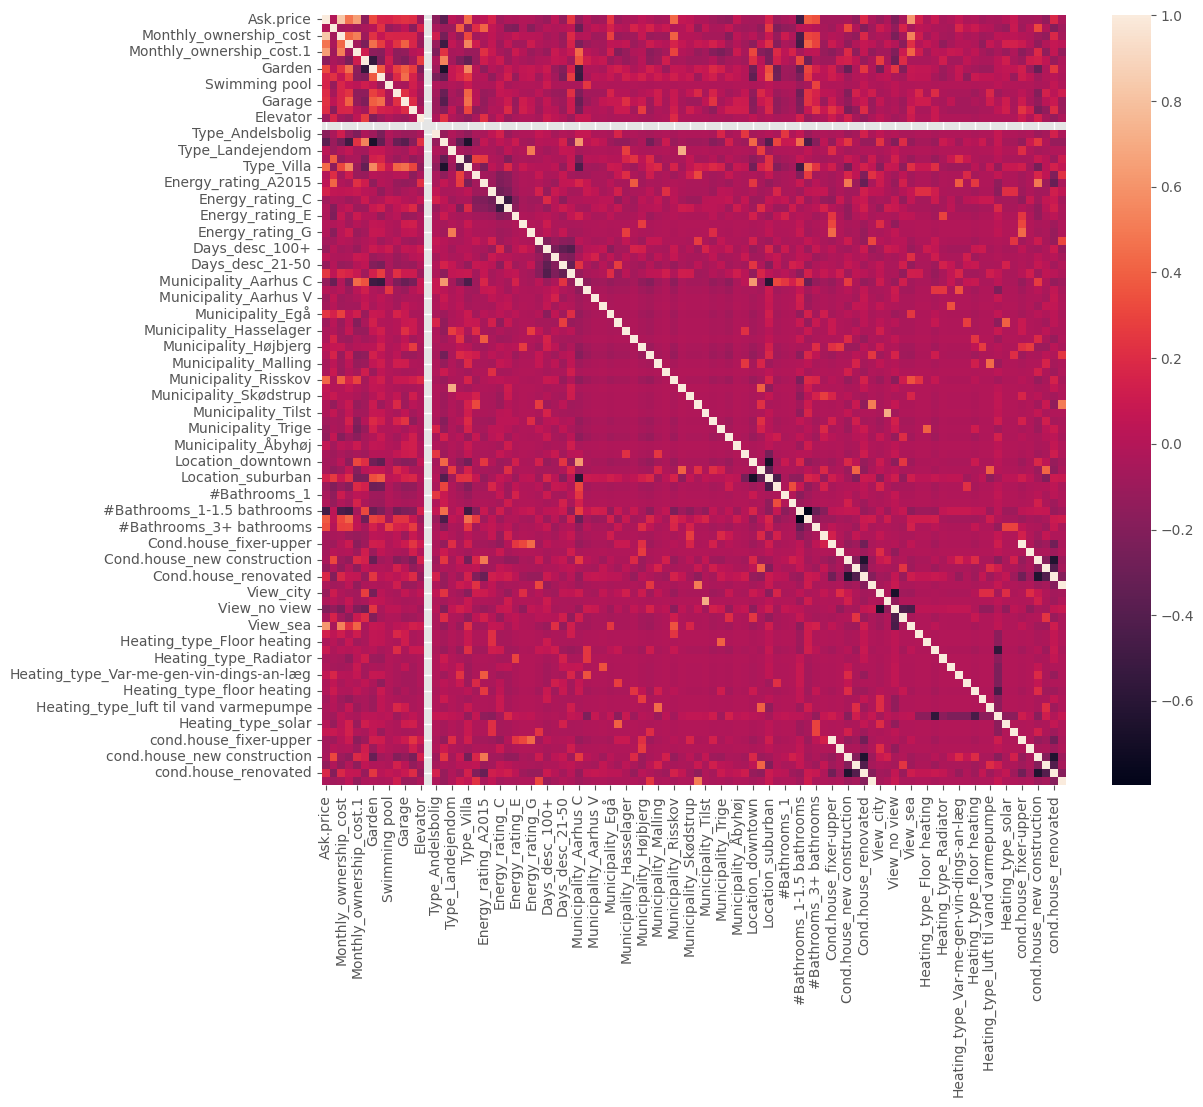

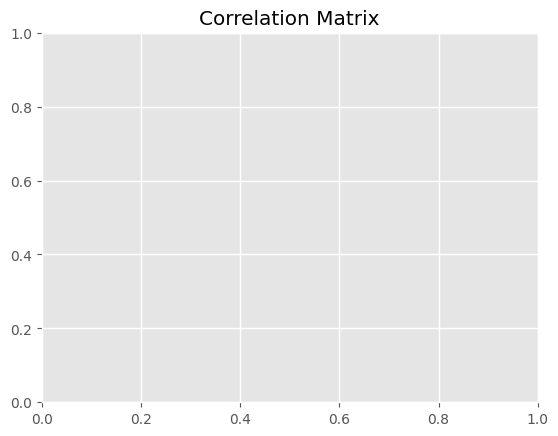

In [ ]:

import seaborn as sns
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()
print(corr_matrix)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
import matplotlib.pyplot as plt

# Assuming you have a correlation matrix called 'corr_matrix'
sns.heatmap(corr_matrix, annot=False)
plt.show()
plt.title('Correlation Matrix')
plt.show()

high_corr = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)]




In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Set the threshold for variance
threshold = 0.01

# Create the VarianceThreshold object
selector = VarianceThreshold(threshold=threshold)

df_encoded = pd.get_dummies(df)

# Fit the selector to the data
selector.fit(df_encoded)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Filter the dataframe based on the selected indices
df_filtered = df_encoded.iloc[:, selected_indices]

# Print the filtered dataframe
print(df_filtered)

     Ask.price  Year_built  Monthly_ownership_cost  Rooms  Balcony  Garden  \
0      2499000        1911                    2466      3     True    True   
1      3495000        1930                    3918      3    False   False   
2      2748000        1970                    2638      4    False    True   
3      3650000        1900                    3204      4    False    True   
4      1199000        1970                    2050      2    False   False   
..         ...         ...                     ...    ...      ...     ...   
192    2200000        1872                    2395      3    False    True   
193    2845000        1967                    2156      4    False    True   
194    3395000        1954                    3563      2    False    True   
195    3498000        1960                    3770      5    False    True   
196    2398000        1972                    3339      2     True   False   

     Parking  Fireplace  Garage  Basement  ...  Heating_type_Ra

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Apply a conditional mask to filter the values
filtered_corr_matrix = corr_matrix[(corr_matrix > 0.60) | (corr_matrix < -0.60)]

# Print the filtered correlation matrix
print(filtered_corr_matrix)





                             Ask.price  Year_built  Monthly_ownership_cost  \
Ask.price                     1.000000         NaN                0.827577   
Year_built                         NaN         1.0                     NaN   
Monthly_ownership_cost        0.827577         NaN                1.000000   
Rooms                              NaN         NaN                     NaN   
Balcony                            NaN         NaN                     NaN   
...                                ...         ...                     ...   
cond.house_good condition          NaN         NaN                     NaN   
cond.house_new construction        NaN         NaN                     NaN   
cond.house_not_stated              NaN         NaN                     NaN   
cond.house_renovated               NaN         NaN                     NaN   
cond.house_well-maintained         NaN         NaN                     NaN   

                             Rooms  Balcony  Garden  Parking  S

In [ ]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the cleaned descriptions
df['Sentiment'] = df['Cleaned_Description'].apply(analyze_sentiment)

# Summary statistics of sentiment scores
sentiment_summary = df['Sentiment'].describe()

# Correlation between sentiment and numerical variables
sentiment_correlation = df[['Sentiment', 'Ask.price', 'days_for_sale']].corr()

sentiment_summary, sentiment_correlation


ModuleNotFoundError: No module named 'textblob'

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(12, 6))

# Histogram of sentiment scores
sns.histplot(df['Sentiment'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

# Boxplot of sentiment scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Sentiment'], color='lightgreen')
plt.title('Boxplot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.grid(True)

plt.show()

# Impact of top keywords on Ask.price and days_for_sale
# For simplicity, we'll analyze the impact of a few top keywords

# Define a function to check if a keyword is in the description
def contains_keyword(keyword, text):
    return keyword in text

# Choose top keywords for analysis
keywords = ['plads', 'god', 'gode', 'byder', 'denne', 'aarhus', 'badeværelse', 'boligen']

# Create a DataFrame to store results
keyword_impact = pd.DataFrame(columns=['Keyword', 'Avg_Ask_Price', 'Avg_Days_for_Sale'])

# Analyze impact of each keyword
for keyword in keywords:
    df[keyword] = df['Description'].apply(lambda x: contains_keyword(keyword, x))
    avg_price = df[df[keyword]]['Ask.price'].mean()
    avg_days_for_sale = df[df[keyword]]['days_for_sale'].mean()
    keyword_impact = keyword_impact.append({'Keyword': keyword, 'Avg_Ask_Price': avg_price, 'Avg_Days_for_Sale': avg_days_for_sale}, ignore_index=True)

keyword_impact


KeyError: 'Sentiment'

<Figure size 1200x600 with 0 Axes>

## Keyword analysis impact on asking price and days for sale

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lower case
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

# Apply preprocessing to the Description column
df['Cleaned_Description'] = df['Description'].apply(preprocess_text)

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='danish', max_features=50)  # Limit to top 50 words
X = vectorizer.fit_transform(df['Cleaned_Description'])

# Create a DataFrame of word counts
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Description']))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Property Descriptions')
plt.show()

# Display top 10 keywords and their counts
top_keywords = word_counts.sum().sort_values(ascending=False).head(10)
top_keywords


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Define a function to check if a keyword is in the description
def contains_keyword(keyword, text):
    return keyword in text

# Initialize a list for storing results
results = []

# Analyze impact of each keyword
keywords = ['plads', 'god', 'gode', 'byder', 'denne', 'aarhus', 'badeværelse', 'boligen']
for keyword in keywords:
    df[keyword] = df['Description'].apply(lambda x: contains_keyword(keyword, x))
    avg_price = df[df[keyword]]['Ask.price'].mean()
    avg_days_for_sale = df[df[keyword]]['days_for_sale'].mean()
    results.append({'Keyword': keyword, 'Avg_Ask_Price': avg_price, 'Avg_Days_for_Sale': avg_days_for_sale})

# Convert results to DataFrame
keyword_impact_df = pd.DataFrame(results)

keyword_impact_df


,Keyword,Avg_Ask_Price,Avg_Days_for_Sale
0,plads,3.766362e+06,76.071006
1,god,3.796617e+06,75.761111
2,gode,3.830200e+06,76.472222
3,byder,3.983438e+06,73.509804
4,denne,3.838017e+06,83.603306
5,aarhus,NaN,NaN
6,badeværelse,3.973093e+06,77.699387
7,boligen,3.857630e+06,79.426667
